# Reading In the data from an excel file

In [7]:
library("readxl")
library(tidyverse)
library(dplyr)
#install.packages("writexl", type = "source", repos = "https://cloud.r-project.org")
#install.packages("dst", type = "source", repos = "https://cloud.r-project.org")
library(writexl)
#read_excel("fatality rates h5n1.xlsx")
#getwd()

fat_data <- read_excel("fatality rates h5n1.xlsx")
fat_data
c <- sum(fat_data$Cases)    
d <- sum(fat_data$Deaths)  
c
d
d/c

Year,Cases,Deaths,Fatality Rate,Sample Size,Years from 2024
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2003,4,4,1.0000000,4,21
2004,46,32,0.6956522,46,20
2005,98,43,0.4387755,98,19
2006,115,79,0.6869565,115,18
2007,88,59,0.6704545,88,17
2008,44,33,0.7500000,44,16
2009,73,32,0.4383562,73,15
2010,48,24,0.5000000,48,14
2011,62,34,0.5483871,62,13


[1] 878

[1] 458

[1] 0.5216401

# Deriving weights from a data point

In [8]:
fat_data <- fat_data|>
  mutate(w_sample = `Sample Size` / 145) # Sample Size weight

fat_data <- fat_data|>
  mutate(w_recency = 2.718^(-0.05 *`Years from 2024`)) # Recency weight
print(fat_data)
#write_xlsx(fat_data, "your_table.xlsx")

fat_data <- fat_data|>
  mutate(final_weight = w_sample * w_recency) # Final weight by combining
print(fat_data)
fat_data




# A tibble: 20 × 8
    Year Cases Deaths `Fatality Rate` `Sample Size` `Years from 2024` w_sample
   <dbl> <dbl>  <dbl>           <dbl>         <dbl>             <dbl>    <dbl>
 1  2003     4      4           1                 4                21  0.0276 
 2  2004    46     32           0.696            46                20  0.317  
 3  2005    98     43           0.439            98                19  0.676  
 4  2006   115     79           0.687           115                18  0.793  
 5  2007    88     59           0.670            88                17  0.607  
 6  2008    44     33           0.75             44                16  0.303  
 7  2009    73     32           0.438            73                15  0.503  
 8  2010    48     24           0.5              48                14  0.331  
 9  2011    62     34           0.548            62                13  0.428  
10  2012    32     20           0.625            32                12  0.221  
11  2013    39     25           0

Year,Cases,Deaths,Fatality Rate,Sample Size,Years from 2024,w_sample,w_recency,final_weight
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2003,4,4,1.0000000,4,21,0.027586207,0.3499758,0.009654506
2004,46,32,0.6956522,46,20,0.317241379,0.3679176,0.116718683
2005,98,43,0.4387755,98,19,0.675862069,0.3867791,0.261409336
2006,115,79,0.6869565,115,18,0.793103448,0.4066076,0.322481890
2007,88,59,0.6704545,88,17,0.606896552,0.4274526,0.259419510
2008,44,33,0.7500000,44,16,0.303448276,0.4493662,0.136359410
2009,73,32,0.4383562,73,15,0.503448276,0.4724033,0.237830620
2010,48,24,0.5000000,48,14,0.331034483,0.4966213,0.164398791
2011,62,34,0.5483871,62,13,0.427586207,0.5220810,0.223234618


# Assigning Each datapoint a fatality rate category



In [9]:
#write_xlsx(fat_data, "your_table.xlsx")

fat_data$Fatality_Category <- with(fat_data, ifelse(`Fatality Rate` <= 0.10, "F1",
                                  ifelse(`Fatality Rate` <= 0.25, "F2",
                                  ifelse(`Fatality Rate` <= 0.50, "F3",
                                  ifelse(`Fatality Rate` <= 0.60, "F4", "F5")))))

fat_data

Year,Cases,Deaths,Fatality Rate,Sample Size,Years from 2024,w_sample,w_recency,final_weight,Fatality_Category
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2003,4,4,1.0000000,4,21,0.027586207,0.3499758,0.009654506,F5
2004,46,32,0.6956522,46,20,0.317241379,0.3679176,0.116718683,F5
2005,98,43,0.4387755,98,19,0.675862069,0.3867791,0.261409336,F3
2006,115,79,0.6869565,115,18,0.793103448,0.4066076,0.322481890,F5
2007,88,59,0.6704545,88,17,0.606896552,0.4274526,0.259419510,F5
2008,44,33,0.7500000,44,16,0.303448276,0.4493662,0.136359410,F5
2009,73,32,0.4383562,73,15,0.503448276,0.4724033,0.237830620,F3
2010,48,24,0.5000000,48,14,0.331034483,0.4966213,0.164398791,F3
2011,62,34,0.5483871,62,13,0.427586207,0.5220810,0.223234618,F4


# Assigning weight to F1-F5, Depending on category, and evenly spreading out the remaining weight across F1-F5. 

In [10]:
library(dst)
fat_data2 <- fat_data|>
  rowwise()|>
  mutate(array_col = case_when(
    Fatality_Category == "F1" ~ list(c(final_weight +(1 - final_weight)/5, (1 - final_weight)/5 ,      (1 - final_weight)/5 ,      (1 - final_weight)/5 ,      (1 - final_weight)/5 )),
    Fatality_Category == "F2" ~ list(c((1 - final_weight)/5 ,      final_weight+(1 - final_weight)/5, (1 - final_weight)/5 ,      (1 - final_weight)/5 ,      (1 - final_weight)/5 )),
    Fatality_Category == "F3" ~ list(c((1 - final_weight)/5 ,      (1 - final_weight)/5 ,      final_weight+(1 - final_weight)/5, (1 - final_weight)/5 ,      (1 - final_weight)/5 )),
    Fatality_Category == "F4" ~ list(c((1 - final_weight)/5 ,      (1 - final_weight)/5 ,      (1 - final_weight)/5 ,      final_weight+(1 - final_weight)/5, (1 - final_weight)/5 )),
    Fatality_Category == "F5" ~ list(c((1 - final_weight)/5 ,      (1 - final_weight)/5 ,      (1 - final_weight)/5 ,      (1 - final_weight)/5 ,      final_weight+(1 - final_weight)/5))
  ))|>
  ungroup()
fat_data2

Warning message:
"package 'dst' was built under R version 4.4.2"


Year Cases Deaths Fatality Rate Sample Size Years from 2024 w_sample   
1  2003   4    4     1.0000000       4         21              0.027586207
2  2004  46   32     0.6956522      46         20              0.317241379
3  2005  98   43     0.4387755      98         19              0.675862069
4  2006 115   79     0.6869565     115         18              0.793103448
5  2007  88   59     0.6704545      88         17              0.606896552
6  2008  44   33     0.7500000      44         16              0.303448276
7  2009  73   32     0.4383562      73         15              0.503448276
8  2010  48   24     0.5000000      48         14              0.331034483
9  2011  62   34     0.5483871      62         13              0.427586207
10 2012  32   20     0.6250000      32         12              0.220689655
11 2013  39   25     0.6410256      39         11              0.268965517
12 2014  52   22     0.4230769      52         10              0.358620690
13 2015 145   42     0.2896552     145          9              1.000000000
14 2016  10    3     0.3000000      10          8              0.068965517
15 2017   4    2     0.5000000       4          7              0.027586207
16 2019   1    1     1.0000000       1          5              0.006896552
17 2020   1    0     0.0000000       1          4              0.006896552
18 2021   2    1     0.5000000       2          3              0.013793103
19 2022   6    1     0.1666667       6          2              0.041379310
20 2023   8    1     0.1250000       8          1              0.055172414
   w_recency final_weight Fatality_Category array_col <NA>      <NA>     
1  0.3499758 0.009654506  F5                0.1980691 0.1766563 0.1477181
2  0.3679176 0.116718683  F5                0.1980691 0.1766563 0.1477181
3  0.3867791 0.261409336  F3                0.1980691 0.1766563 0.4091275
4  0.4066076 0.322481890  F5                0.1980691 0.1766563 0.1477181
5  0.4274526 0.259419510  F5                0.2077236 0.2933749 0.1477181
6  0.4493662 0.136359410  F5                0.1980691 0.1766563 0.1477181
7  0.4724033 0.237830620  F3                0.1980691 0.1766563 0.1477181
8  0.4966213 0.164398791  F3                0.1980691 0.1766563 0.4091275
9  0.5220810 0.223234618  F4                0.1980691 0.1766563 0.1477181
10 0.5488458 0.121124586  F5                0.2077236 0.2933749 0.1477181
11 0.5769827 0.155188454  F5                0.1980691 0.1766563 0.1477181
12 0.6065621 0.217525720  F3                0.1980691 0.1766563 0.1477181
13 0.6376579 0.637657903  F3                0.1980691 0.1766563 0.4091275
14 0.6703478 0.046230886  F3                0.1980691 0.1766563 0.1477181
15 0.7047137 0.019440377  F3                0.2077236 0.2933749 0.1477181
16 0.7788210 0.005371179  F5                0.1980691 0.1766563 0.1477181
17 0.8187477 0.005646536  F1                0.1980691 0.1766563 0.1477181
18 0.8607214 0.011872019  F3                0.1980691 0.1766563 0.4091275
19 0.9048468 0.037441937  F2                0.1980691 0.1766563 0.1477181
20 0.9512344 0.052481895  F2                0.2077236 0.2933749 0.1477181
   <NA>      <NA>      <NA>      <NA>      <NA>      <NA>      <NA>     
1  0.1355036 0.1481161 0.1727281 0.1524339 0.1671202 0.1553531 0.1757751
2  0.1355036 0.1481161 0.1727281 0.1524339 0.1671202 0.1553531 0.1757751
3  0.1355036 0.1481161 0.1727281 0.3902645 0.3315190 0.1553531 0.1757751
4  0.1355036 0.1481161 0.1727281 0.1524339 0.1671202 0.3785877 0.1757751
5  0.4579855 0.4075356 0.3090875 0.1524339 0.1671202 0.1553531 0.2968997
6  0.1355036 0.1481161 0.1727281 0.1524339 0.1671202 0.1553531 0.1757751
7  0.1355036 0.1481161 0.1727281 0.1524339 0.1671202 0.1553531 0.1757751
8  0.1355036 0.1481161 0.1727281 0.3902645 0.3315190 0.1553531 0.1757751
9  0.1355036 0.1481161 0.1727281 0.1524339 0.1671202 0.3785877 0.1757751
10 0.4579855 0.4075356 0.3090875 0.1524339 0.1671202 0.1553531 0.2968997
11 0.1355036 0.1481161 0.1727281 0.1524339 0.1671202 0.1553531 0.175775

# Some Extra processing to make the the array file work.

In [11]:
weights <- fat_data2 
  #unnest_wider(array_col, names_sep = "_")
str(weights$array_col[[1]])

weights <- weights|>
   mutate(
    array_str = map_chr(array_col, ~ paste(round(.x, 3), collapse = ","))
  )

tt1 <- rbind(
  c(1, 0, 0, 0, 0, 0),  # F1
  c(0, 0, 0, 0, 0, 1),  # F6
  c(1, 1, 1, 1, 1, 1)   # Full frame
)# the frame of discerment or whatever
m1 <- weights$array_col
#m1


library(purrr)

# A small helper to build a bca from a length-6 weight vector
bca_from_vector <- function(v, cnames = c("F1","F2","F3","F4","F5","F6"),
                            varname = "FatalityRate") {
  # Identify which positions in 'v' are non-zero
  non_zero_idx <- which(v != 0)

  # If all are zero (unlikely, but just in case), return a "vacuous" BCA?
  if (length(non_zero_idx) == 0) {
    stop("All-zero vector -- cannot create a BCA.")
  }

  # Build a 'tt' matrix: each row corresponds to a subset with 1 in the relevant column(s)
  # BUT in your scenario, each subset is just a single element: F1 or F2 or ...
  # So each focal element is a row of zeros except 1 in that focal element's column.
  # We'll do one row per non-zero element.
  tt_list <- lapply(non_zero_idx, function(i) {
    rowvec <- rep(0, 6)
    rowvec[i] <- 1
    rowvec
  })
  tt <- do.call(rbind, tt_list)  # combine rows

  # The masses are exactly the non-zero entries of v
  m <- v[non_zero_idx]

  # Create the bca object
  bca(
    tt     = tt, 
    m      = m,
    cnames = cnames,
    varnames = varname
  )
}

weights_bca <- weights %>%
  mutate(
    bca_obj = map(array_col, ~ bca_from_vector(.x))
  )

#weights_bca
#str(weights_bca)


 num [1:5] 0.198 0.198 0.198 0.198 0.208


# I have no Idea I chatgpted this part but it works

In [12]:







combined_unnorm <- reduce(
  weights_bca$bca_obj,
  ~ dsrwon(.x, .y)     # .x is the "accumulator", .y is the next BCA
)
#combined_unnorm

# Now 'combined_unnorm' is a bcaspec representing the *unnormalized* combination.

combined_bca <- nzdsr(combined_unnorm)
#combined_bca

res_belplau <- belplau(combined_bca)
res_belplau

,bel,disbel,unc,plau,rplau
F1,0.001777582,0.9978361,0.0003863089,0.002163891,0.002167744
F2,0.002636487,0.9969772,0.0003863089,0.003022796,0.003030787
F3,0.824263876,0.1753498,0.0003863089,0.824650185,4.692547941
F4,0.004212280,0.9954014,0.0003863089,0.004598589,0.004618041
F5,0.166723465,0.8328902,0.0003863089,0.167109774,0.200545398


## NEW METHOD

In [13]:
library("readxl")
library(tidyverse)
library(dplyr)

# Read dataset
fat_data <- read_excel("fatality rates h5n1.xlsx")

# Define four 5-year intervals
fat_data <- fat_data |> 
  mutate(Interval = case_when(
    Year >= 2019 & Year <= 2023 ~ "Interval 1",
    Year >= 2014 & Year <= 2018 ~ "Interval 2",
    Year >= 2009 & Year <= 2013 ~ "Interval 3",
    Year >= 2004 & Year <= 2008 ~ "Interval 4"
  ))

# Compute weights
fat_data <- fat_data |> 
  mutate(
    w_sample = `Sample Size` / 145,  # Normalize sample size
    w_recency = exp(-0.05 * `Years from 2024`),  # Recency function
    final_weight = w_sample * w_recency  # Combined weight
  )

print(fat_data)


# A tibble: 20 × 10
    Year Cases Deaths `Fatality Rate` `Sample Size` `Years from 2024` Interval  
   <dbl> <dbl>  <dbl>           <dbl>         <dbl>             <dbl> <chr>     
 1  2003     4      4           1                 4                21 NA        
 2  2004    46     32           0.696            46                20 Interval 4
 3  2005    98     43           0.439            98                19 Interval 4
 4  2006   115     79           0.687           115                18 Interval 4
 5  2007    88     59           0.670            88                17 Interval 4
 6  2008    44     33           0.75             44                16 Interval 4
 7  2009    73     32           0.438            73                15 Interval 3
 8  2010    48     24           0.5              48                14 Interval 3
 9  2011    62     34           0.548            62                13 Interval 3
10  2012    32     20           0.625            32                12 Interval 3
11  2013

## EACH YEAR WEIGHT CALC

In [26]:
fat_data <- fat_data |> 
  mutate(Fatality_Category = ifelse(`Fatality Rate` > 0.50, "F1", "F2"))

# Print data in a readable format
cat("\nYearly Fatality Classification & Weights:\n")
print(fat_data |> select(Year, Interval, `Fatality Rate`, Fatality_Category, final_weight))



Yearly Fatality Classification & Weights:
# A tibble: 20 × 5
    Year Interval   `Fatality Rate` Fatality_Category final_weight
   <dbl> <chr>                <dbl> <chr>                    <dbl>
 1  2003 NA                   1     F1                     0.00965
 2  2004 Interval 4           0.696 F1                     0.117  
 3  2005 Interval 4           0.439 F2                     0.261  
 4  2006 Interval 4           0.687 F1                     0.322  
 5  2007 Interval 4           0.670 F1                     0.259  
 6  2008 Interval 4           0.75  F1                     0.136  
 7  2009 Interval 3           0.438 F2                     0.238  
 8  2010 Interval 3           0.5   F2                     0.164  
 9  2011 Interval 3           0.548 F1                     0.223  
10  2012 Interval 3           0.625 F1                     0.121  
11  2013 Interval 3           0.641 F1                     0.155  
12  2014 Interval 2           0.423 F2                     0.218  


## INTERVAL MASS WITH SUBSET TAKING FROM F1 and F2

In [15]:
# Compute total weight per category (F1, F2)
interval_masses <- fat_data |> 
  group_by(Interval, Fatality_Category) |> 
  summarise(mass = sum(final_weight), .groups = 'drop')

# Compute variance of fatality rates per interval
disagreement <- fat_data |> 
  group_by(Interval) |> 
  summarise(variance = var(`Fatality Rate`, na.rm = TRUE), .groups = 'drop')

# Logistic function parameters
alpha <- 20
x0 <- mean(disagreement$variance, na.rm = TRUE)  

# Assign mass to (F1, F2) subset using the logistic function
interval_masses <- interval_masses |> 
  left_join(disagreement, by = "Interval") |> 
  mutate(m_subset = pmin(1 / (1 + exp(-alpha * (variance - x0))), 70)) |> 
  group_by(Interval) |> 
  mutate(
    mass_F1 = ifelse(Fatality_Category == "F1", mass * (1 - m_subset), 0),
    mass_F2 = ifelse(Fatality_Category == "F2", mass * (1 - m_subset), 0)
  ) |> 
  summarise(mass_F1 = sum(mass_F1), mass_F2 = sum(mass_F2), m_subset = mean(m_subset), .groups = 'drop')

# Print final weights in a readable format
cat("\nFinal Mass Assignments per Interval:\n")
print(interval_masses)




Final Mass Assignments per Interval:
# A tibble: 5 × 4
  Interval     mass_F1 mass_F2 m_subset
  <chr>          <dbl>   <dbl>    <dbl>
1 Interval 1  0.000497 0.00995    0.907
2 Interval 2  0        0.629      0.317
3 Interval 3  0.192    0.436      0.304
4 Interval 4  0.555    0.174      0.336
5 NA         NA        0         NA    


In [16]:
library(dst)
library(purrr)

# Convert mass assignments to belief functions
belief_functions <- list()
for (i in 1:nrow(interval_masses)) {
  row <- interval_masses[i, ]
  mass_vector <- c(row$mass_F1, row$mass_F2, row$m_subset)
  
  # Ensure mass vector is valid and does not contain NA values
  if (any(is.na(mass_vector)) || sum(mass_vector, na.rm = TRUE) == 0) {
    mass_vector <- c(1e-6, 1e-6, 1 - 2e-6)  # Avoid zero-mass errors
  } else {
    mass_vector <- mass_vector / sum(mass_vector, na.rm = TRUE)  # Normalize
  }
  
  belief_functions[[i]] <- bca(
    tt = matrix(c(1, 0, 0, 1, 1, 1), ncol = 2, byrow = TRUE),
    m = mass_vector,
    cnames = c("F1", "F2")
  )
}

# Apply Dempster’s Rule iteratively
combined_unnorm <- reduce(belief_functions, ~ dsrwon(.x, .y))
combined_bca <- nzdsr(combined_unnorm)

# Compute belief and plausibility values
res_belplau <- belplau(combined_bca)

# Print results in a readable format
cat("\nFinal Combined Belief-Plausibility Table:\n")
print(res_belplau)


Final Combined Belief-Plausibility Table:
            bel    disbel           unc      plau         rplau
F1    0.2301429 0.7008564  6.900071e-02 0.2991436  3.885703e-01
F2    0.7008564 0.2301429  6.900071e-02 0.7698571  2.573537e+00
frame 1.0000000 0.0000000 -2.220446e-16 1.0000000 -4.503600e+15


## INTERVAL MASS WITH SUBSET NOT TAKING FROM F1 and F2

In [27]:
# Compute total weight per category (F1, F2)
interval_masses <- fat_data |> 
  group_by(Interval, Fatality_Category) |> 
  summarise(mass = sum(final_weight), .groups = 'drop')

# Compute variance of fatality rates per interval
disagreement <- fat_data |> 
  group_by(Interval) |> 
  summarise(variance = var(`Fatality Rate`, na.rm = TRUE), .groups = 'drop')

# Logistic function parameters
alpha <- 1  
x0 <- mean(disagreement$variance, na.rm = TRUE)  

# Assign mass to (F1, F2) subset separately, without taking away from F1/F2
interval_masses <- interval_masses |> 
  left_join(disagreement, by = "Interval") |> 
  mutate(
    m_subset = pmin(1 / (1 + exp(-alpha * (variance - x0))), 0.7)  # Additive mass
  ) |> 
  group_by(Interval) |> 
  summarise(
    mass_F1 = sum(ifelse(Fatality_Category == "F1", mass, 0), na.rm = TRUE),  # Full F1 mass
    mass_F2 = sum(ifelse(Fatality_Category == "F2", mass, 0), na.rm = TRUE),  # Full F2 mass
    m_subset = mean(m_subset, na.rm = TRUE)  # Additional mass for subset
  )

# Print final mass distribution
cat("\nFinal Mass Assignments per Interval (Preserving F1 & F2 Masses):\n")
print(interval_masses)



Final Mass Assignments per Interval (Preserving F1 & F2 Masses):
# A tibble: 5 × 4
  Interval   mass_F1 mass_F2 m_subset
  <chr>        <dbl>   <dbl>    <dbl>
1 Interval 1 0.00537   0.107    0.528
2 Interval 2 0         0.921    0.490
3 Interval 3 0.500     0.402    0.490
4 Interval 4 0.835     0.261    0.491
5 NA         0.00965   0      NaN    


In [28]:
library(dst)
library(purrr)

# Convert mass assignments to belief functions
belief_functions <- list()
for (i in 1:nrow(interval_masses)) {
  row <- interval_masses[i, ]
  mass_vector <- c(row$mass_F1, row$mass_F2, row$m_subset)
  
  # Ensure mass vector is valid and does not contain NA values
  if (any(is.na(mass_vector)) || sum(mass_vector, na.rm = TRUE) == 0) {
    mass_vector <- c(1e-6, 1e-6, 1 - 2e-6)  # Avoid zero-mass errors
  } else {
    mass_vector <- mass_vector / sum(mass_vector, na.rm = TRUE)  # Normalize
  }
  
  belief_functions[[i]] <- bca(
    tt = matrix(c(1, 0, 0, 1, 1, 1), ncol = 2, byrow = TRUE),
    m = mass_vector,
    cnames = c("F1", "F2")
  )
}

# Apply Dempster’s Rule iteratively
combined_unnorm <- reduce(belief_functions, ~ dsrwon(.x, .y))
combined_bca <- nzdsr(combined_unnorm)

# Compute belief and plausibility values
res_belplau <- belplau(combined_bca)

# Print results in a readable format
cat("\nFinal Combined Belief-Plausibility Table:\n")
print(res_belplau)


Final Combined Belief-Plausibility Table:
            bel    disbel           unc      plau         rplau
F1    0.3181204 0.6113042  7.057543e-02 0.3886958  5.700358e-01
F2    0.6113042 0.3181204  7.057543e-02 0.6818796  1.754276e+00
frame 1.0000000 0.0000000 -4.440892e-16 1.0000000 -2.251800e+15


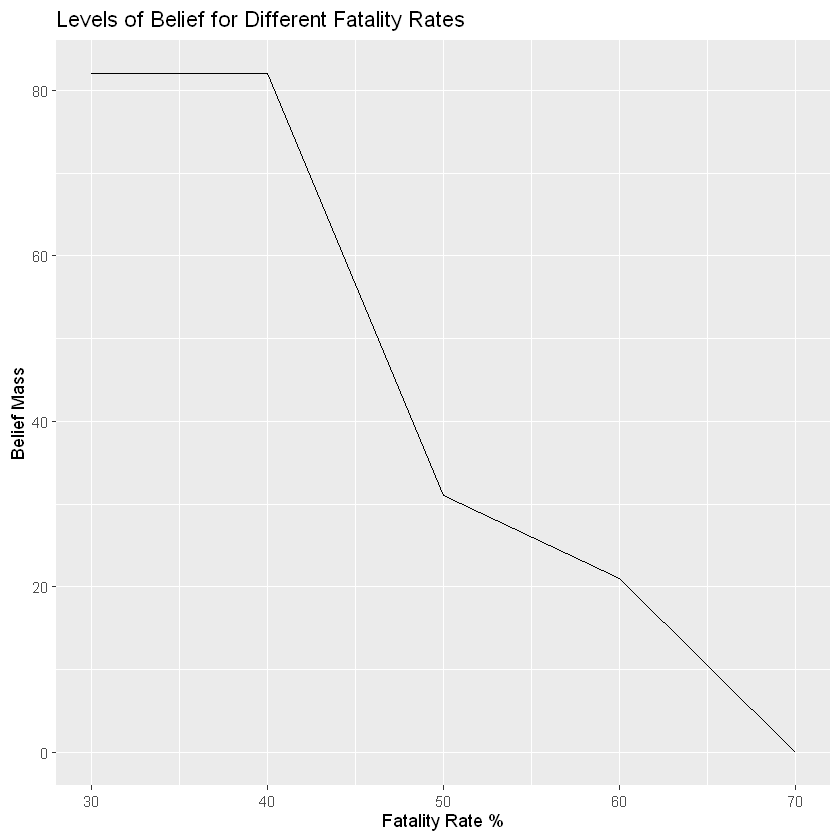

In [25]:
data <- data.frame(
    belief = c(82,82 ,31 , 21, 0.0098),  # Example belief percentages
    fatality_rate = c(30, 40, 50, 60, 70),
    plaus = c(0.04)
)
plot <- data|>
ggplot()+ geom_line(aes(x = fatality_rate, y = belief ))+
labs(x = "Fatality Rate %", y  = "Belief Mass", title = "Levels of Belief for Different Fatality Rates")

plot

## DIFFIRENT SUBSET MASS APPROACH

In [15]:
# Compute total weight per category (F1, F2)
interval_masses <- fat_data |> 
  group_by(Interval, Fatality_Category) |> 
  summarise(mass = sum(final_weight), .groups = 'drop')

# Compute variance of fatality rates per interval
disagreement <- fat_data |> 
  group_by(Interval) |> 
  summarise(variance = var(`Fatality Rate`, na.rm = TRUE), .groups = 'drop')

# Logistic function parameters
alpha <- 1  
x0 <- mean(disagreement$variance, na.rm = TRUE)  

# Assign mass to (F1, F2) subset separately, without taking away from F1/F2
interval_masses <- interval_masses |> 
  left_join(disagreement, by = "Interval") |> 
  mutate(
    m_subset = pmin(0.1 + (variance - min(variance, na.rm = TRUE)) * (0.7 - 0.1) / 
                 (max(variance, na.rm = TRUE) - min(variance, na.rm = TRUE)), 0.7)
  ) |> 
  group_by(Interval) |> 
  summarise(
    mass_F1 = sum(ifelse(Fatality_Category == "F1", mass, 0), na.rm = TRUE),  # Full F1 mass
    mass_F2 = sum(ifelse(Fatality_Category == "F2", mass, 0), na.rm = TRUE),  # Full F2 mass
    m_subset = mean(m_subset, na.rm = TRUE)  # Additional mass for subset
  )

# Print final mass distribution
cat("\nFinal Mass Assignments per Interval (Preserving F1 & F2 Masses):\n")
print(interval_masses)



Final Mass Assignments per Interval (Preserving F1 & F2 Masses):
# A tibble: 5 × 4
  Interval   mass_F1 mass_F2 m_subset
  <chr>        <dbl>   <dbl>    <dbl>
1 Interval 1 0.00537   0.107    0.7  
2 Interval 2 0         0.921    0.112
3 Interval 3 0.500     0.402    0.1  
4 Interval 4 0.835     0.261    0.129
5 NA         0.00965   0      NaN    


In [16]:
library(dst)
library(purrr)

# Convert mass assignments to belief functions
belief_functions <- list()
for (i in 1:nrow(interval_masses)) {
  row <- interval_masses[i, ]
  mass_vector <- c(row$mass_F1, row$mass_F2, row$m_subset)
  
  # Ensure mass vector is valid and does not contain NA values
  if (any(is.na(mass_vector)) || sum(mass_vector, na.rm = TRUE) == 0) {
    mass_vector <- c(1e-6, 1e-6, 1 - 2e-6)  # Avoid zero-mass errors
  } else {
    mass_vector <- mass_vector / sum(mass_vector, na.rm = TRUE)  # Normalize
  }
  
  belief_functions[[i]] <- bca(
    tt = matrix(c(1, 0, 0, 1, 1, 1), ncol = 2, byrow = TRUE),
    m = mass_vector,
    cnames = c("F1", "F2")
  )
}

# Apply Dempster’s Rule iteratively
combined_unnorm <- reduce(belief_functions, ~ dsrwon(.x, .y))
combined_bca <- nzdsr(combined_unnorm)

# Compute belief and plausibility values
res_belplau <- belplau(combined_bca)

# Print results in a readable format
cat("\nFinal Combined Belief-Plausibility Table:\n")
print(res_belplau)


Final Combined Belief-Plausibility Table:
            bel    disbel          unc      plau        rplau
F1    0.2142910 0.7808701 4.838906e-03 0.2191299 2.788945e-01
F2    0.7808701 0.2142910 4.838906e-03 0.7857090 3.585586e+00
frame 1.0000000 0.0000000 4.440892e-16 1.0000000 2.251800e+15


##EMPTY SET

In [24]:
# Ensure total mass is valid
belief_functions <- list()
for (i in 1:nrow(interval_masses)) {
  row <- interval_masses[i, ]
  mass_vector <- c(row$mass_F1, row$mass_F2, row$m_subset, 0)  # Add zero mass for empty set
  
  # Ensure mass sums to 1
  if (sum(mass_vector, na.rm = TRUE) == 0) {
    mass_vector <- c(1e-6, 1e-6, 1 - 2e-6, 0)  # Avoid zero-mass errors
  } else {
    mass_vector <- mass_vector / sum(mass_vector, na.rm = TRUE)
  }
  
  belief_functions[[i]] <- bca(
    tt = matrix(c(1, 0, 0, 1, 1, 1, 0, 0), ncol = 2, byrow = TRUE),  # Add row for empty set
    m = mass_vector,
    cnames = c("F1", "F2")
  )
}


In [18]:
library(dst)
library(purrr)

# Convert mass assignments to belief functions
belief_functions <- list()
for (i in 1:nrow(interval_masses)) {
  row <- interval_masses[i, ]
  mass_vector <- c(row$mass_F1, row$mass_F2, row$m_subset, 0)  # Explicitly include m(empty set) = 0
  
  # Ensure mass vector is valid and sums to 1
  if (any(is.na(mass_vector)) || sum(mass_vector, na.rm = TRUE) == 0) {
    mass_vector <- c(1e-6, 1e-6, 1 - 2e-6, 0)  # Avoid zero-mass errors, keeping empty set at 0
  } else {
    mass_vector <- mass_vector / sum(mass_vector, na.rm = TRUE)
  }
  
  belief_functions[[i]] <- bca(
    tt = matrix(c(1, 0, 0, 1, 1, 1, 0, 0), ncol = 2, byrow = TRUE),  # Include empty set row
    m = mass_vector,
    cnames = c("F1", "F2")
  )
}

# Apply Dempster’s Rule iteratively
combined_unnorm <- reduce(belief_functions, ~ dsrwon(.x, .y))
combined_bca <- nzdsr(combined_unnorm)

# Compute belief and plausibility values
res_belplau <- belplau(combined_bca)

# Print results in a readable format
cat("\nFinal Combined Belief-Plausibility Table:\n")
print(res_belplau)



Final Combined Belief-Plausibility Table:
            bel    disbel          unc      plau        rplau
F1    0.2142910 0.7808701 4.838906e-03 0.2191299 2.788945e-01
F2    0.7808701 0.2142910 4.838906e-03 0.7857090 3.585586e+00
frame 1.0000000 0.0000000 4.440892e-16 1.0000000 2.251800e+15
